<h1 align="center">Volume 2: The Discrete Fourier Transform & Filtering and Convolution.</h1>

# The Discrete Fourier Transform

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
import IPython
import scipy as sp
import time
from scipy import signal
from scipy.misc import imread
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

## SoundWave Class

In [61]:
class SoundWave(object):
    """A SoundWave class for working with digital audio signals.
    Attributes:
        rate (int): The sample rate of the sound.
        samples ((n,) ndarray): NumPy array of samples.
    """
    # Problem 1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.
        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        Returns:
            A SoundWave object.
        """
        self.rate = rate
        self.samples = samples
        
    def plot(self):
        """Plot and display the graph of the sound wave."""
        t = np.linspace(0, self.samples.size/self.rate, self.samples.size)
        plt.plot(t, self.samples)
        plt.xlabel("Time (s)")
        plt.show()
        
    # Problem 2
    def export(self, filename):
        """Generate a wav file called filename from the sample rate and samples. 
        If the array of samples is not of type int16, scale it so that it is."""
        samples = np.int16(self.samples)
        wavfile.write(filename, self.rate, samples)
        
    # Problem 4
    def __add__(self, other):
        """Add two sound waves together into one wave."""
        if self.samples.size != other.samples.size:
            raise ValueError("Sample size of the two objects are not equal.")
        return SoundWave(self.rate, self.samples + other.samples)
        
    def append(self, other):
        """Append additional samples to the end of the current samples."""
        if self.rate != other.rate:
            raise ValueError("Sample rates of the two objects are not equal.")
        self.samples = np.hstack([self.samples, other.samples])
    
    # Problem 7
    def plot_dft(self):
        """Take the DFT of the sound wave. Scale the x-axis so the x-values correspond
        to the frequencies present in the plot. Display the left half of the plot."""
        dft = abs(sp.fft(self.samples))
        N = dft.shape[0]
        x_vals = np.linspace(1, N, N)
        x_vals = x_vals * self.rate / N
        plt.plot(x_vals[:N//2], dft[:N//2])
        plt.xlabel("Frequency (Hz)")
        plt.show()

## Problem 1

Write the `SoundWave` constructor.

Write the `plot()` method of the `SoundWave` class.

Plot the `tada.wav` file.

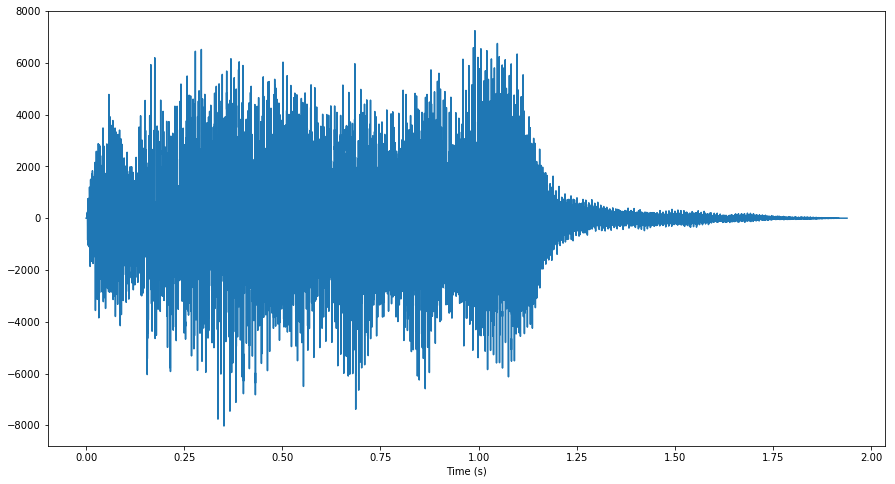

In [45]:
rate, wave = wavfile.read("tada.wav")
S = SoundWave(rate, wave)
S.plot()

## Problem 2

Write the `export()` method of the `SoundWave` class.

Display the original `tada.wav` sound.

In [46]:
IPython.display.Audio('tada.wav')

Use the export method to create a differently named file containing the same sound as `tada.wav`. Display this sound.

In [47]:
S.export('tada2.wav')
IPython.display.Audio('tada2.wav')

## Problem 3

In [88]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 samples per second.
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    samplerate = 44100
    wave_function = lambda x: np.sin(2*np.pi*x*frequency)
    sample_points = np.linspace(0, duration, int(samplerate*duration))
    samples = wave_function(sample_points)
    samples *= 32767
    return SoundWave(samplerate, samples)

Generate an 'A' note and display it.

In [89]:
sound = generate_note(440.0, 2.0)
IPython.display.Audio(rate=sound.rate, data=sound.samples)

## Problem 4

Write the `add()` magic method of the `SoundWave` class.

Generate a minor chord ('A', 'C', and 'E' notes) and display it.

In [62]:
A = generate_note(440.0, 2.0)
C = generate_note(523.25, 2.0)
E = generate_note(659.25, 2.0)
A_minor = A + C + E
IPython.display.Audio(rate=A_minor.rate, data=A_minor.samples)

Write the `append()` method of the `SoundWave` class.

Generate and display a sound that changes over time.

In [51]:
G = generate_note(783.99, 2.0)
arpeggio = SoundWave(C.rate, C.samples)

In [52]:
arpeggio.append(E)
arpeggio.append(G)
arpeggio.append(E)
arpeggio.append(C)

IPython.display.Audio(rate=arpeggio.rate, data=arpeggio.samples)

## Problem 5

In [53]:
def naive_DFT(samples):
    """Compute the DFT of the array of samples using the naive method.
    Parameters:
        samples ((n,) ndarray): NumPy array of samples.
    Returns:
        dft ((n,) ndarray): The DFT of the given array."""
    coefficients= []
    N = len(samples)
    for k in range(len(samples)):
        c_k = sum([x*np.exp(-2*np.pi*1j*k*n/N) for n,x in enumerate(samples)])
        coefficients.append(c_k)
    return np.array(coefficients)

Take the DFT of a small array of samples using your naive function and the SciPy method. Print the results of `np.allclose()` to verify that your function works.

In [54]:
l = np.random.random(size=10)
np.allclose(naive_DFT(l), sp.fft(l))

True

## Problem 6

In [56]:
def FFT(samples):
    """Compute the DFT using the FFT algorithm.
    Parameters:
        samples ((n,) ndarray): NumPy array of samples.
    Returns:
        dft ((n,) ndarray): The DFT of the given array."""
    N = len(samples)
    if N == 1:
        return naive_DFT(samples)
    else:
        even = FFT(samples[::2])
        odd = FFT(samples[1::2])
        k = np.arange(N)
        factor = np.exp(-2*np.pi*1j*k/N)
        return np.concatenate([even+(factor[:N//2]*odd), even+(factor[N//2:]*odd)])
    

Generate a small array of random samples (size must be a power of 2) and take its DFT using the FFT function you wrote and the SciPy method. Print the results of `np.allclose()` to verify that your function works.

In [57]:
l = np.random.random(size=1024)
np.allclose(FFT(l), sp.fft(l))

True

Now, compare the runtimes of your `naive_DFT()`, your `FFT()` function, and the SciPy method on the same random sample. Print the results.

In [58]:
t1 = time.time()
FFT(l)
t2 = time.time()
naive_DFT(l)
t3 = time.time()

time_fft = t2-t1
time_dft = t3-t2
print("time taken for fft: " + str(time_fft))
print("time taken for dft: " + str(time_dft))

time taken for fft: 0.026747941970825195
time taken for dft: 4.656799077987671


## Problem 7

Write the `plot_dft()` method in the `SoundWave` class.

Display the plot of the DFT of the 'A' note.

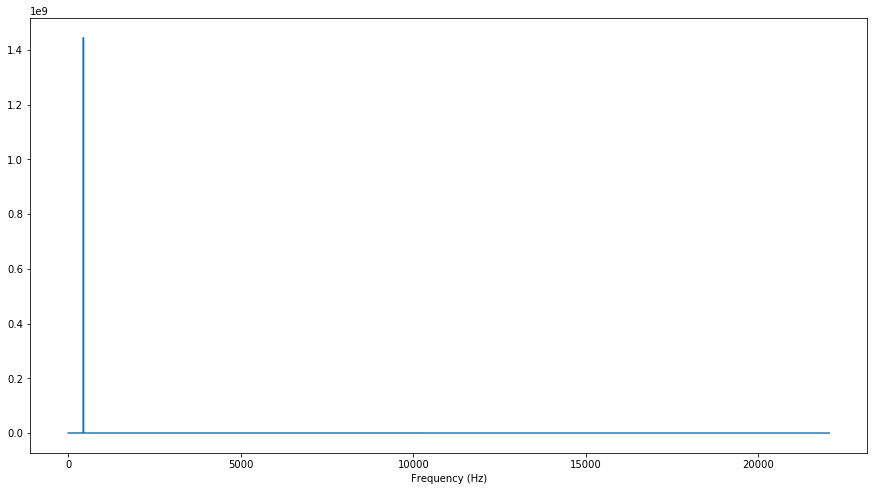

In [63]:
A.plot_dft()

Display the plot of the DFT of the minor chord.

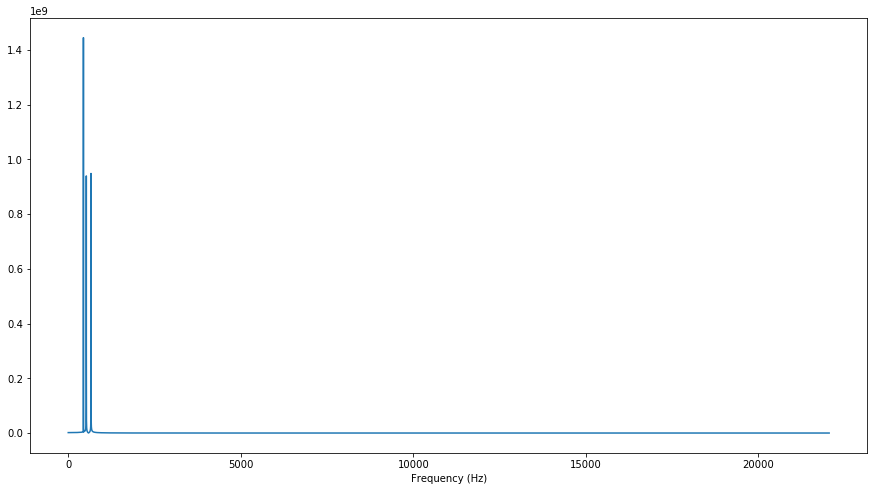

In [64]:
A_minor.plot_dft()

## Problem 8

Use the information you have learned about the DFT to determine the notes present in the `mystery_sound.wav` file.

In [65]:
IPython.display.Audio('mystery_sound.wav')

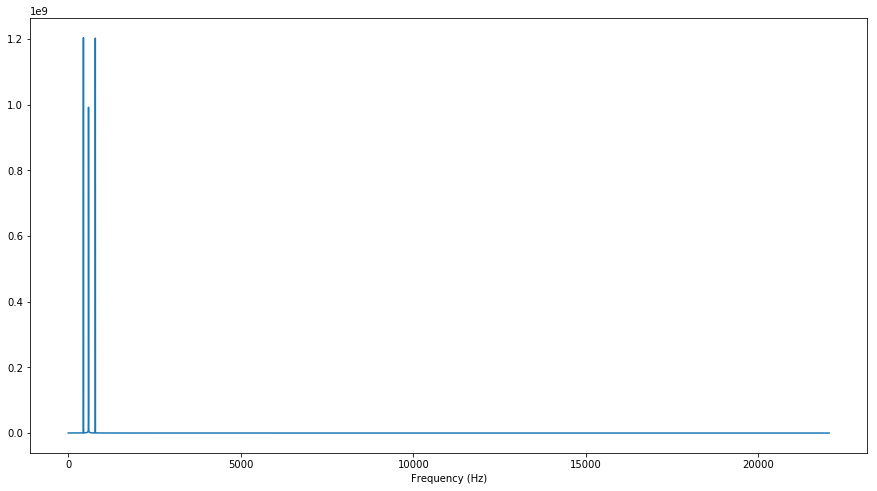

In [78]:
rate, wave = wavfile.read("mystery_sound.wav")
mystery = SoundWave(rate, wave)
mystery.plot_dft()

In [80]:
mystery_dft = abs(sp.fft(mystery.samples))
N = mystery_dft.shape[0]
x = np.linspace(1, N, N)
x = x * mystery.rate / N
while np.amax(mystery_dft) > 8e8:
    i = np.argmax(mystery_dft)
    print(x[i])
    mystery_dft[i] = 0

440.2
43660.2
784.2
43316.2
43512.8
587.6


What are the notes present in the mystery sound?

A, D, G :)

    Note the DFT and FFT algorithms used in problem 5 and 6 were inspired by algorithms found at https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/.

# Filtering and Convolution

## Problem 1

In [ ]:
# Audio of tada.wav.
IPython.display.Audio("tada.wav")

Create a `SoundWave` object that is the circular convolution of `tada.wav` and two seconds of white noise. 

Use the `append()` method in the `SoundWave` class to loop multiple copies of the signal consecutively. 

## Problem 2

In [ ]:
# Audio of the AEA.wav
IPython.display.Audio('AEA.wav')

In [ ]:
# Audio of EAE.wav
IPython.display.Audio('EAE.wav')

Write a function called `convolve_fft()` below that calculates the linear convolution using the FFT and IFFT. 

In [ ]:
# Naive algorithm for a linear convolution. 
def naive_convolve(sample1,sample2):
    """Calculate the linear conovolution of sample1 and sample2 using the definition of convolution.

    Parameters:
        sample1 ((n,) ndarray): an array of length n representing the first sound sample. 
        sample2 ((m,) ndarray): an array of length m representing the second sound sample. 
    
    Return:
        ((n+m-1,) ndarray): an array of length n+m-1 representing the convolution of the two samples. 
    """
    sig1 = np.append(sample1, np.zeros(len(sample2)-1))
    sig2 = np.append(sample2, np.zeros(len(sample1)-1))

    final = np.zeros_like(sig1)
    rsig1 = sig1[::-1]
    for k in range(len(sig1)):
        final[k] = np.sum((np.append(rsig1[(k-1):],rsig1[:(k-1)]))*sig2)
    return final

# Linear Convolution using the Fourier Transforms
def convolve_fft(sample1,sample2):
    """Calculate the linear conovolution of sample1 and sample2 using the Convolution Theorem.

    Parameters:
        sample1 ((n,) ndarray): an array of length n representing the first sound samples. 
        sample2 ((m,) ndarray): an array of length m representing the second sound samples. 
    
    Return:
        ((n+m-1,) ndarray): an array of length n+m-1 representing the convolution of the two samples. 
    """
    raise NotImplementedError("Problem 2 Incomplete")

Report the amount of time it takes to convolve samples of `AEA.wav` and `EAE.wav` with the function you have written `convolve_fft()`, `signal.convolve.fft()`, and `naive_convolve()`. 

In [ ]:
# Listen to the audio created by the convolve_fft() function.  

In [ ]:
# Listen to the audio created by the sp.signal.fftconvolve() function. 

## Problem 3

In [ ]:
# Audio of chopin.wav. 
IPython.display.Audio("chopin.wav")

In [ ]:
# Audio of balloon.wav. 
IPython.display.Audio("balloon.wav")

Use the `signal.fftconvolve()` to convolve the signals of `balloon.wav` and `chopin.wav`.

## Problem 4

Write a function that removes a range of frequencies in a signal.

In [ ]:
def clean_signal(samples, rate, low_freq, high_freq):
    """Remove a range of frequencies from a sound sample using the Fourier Transform. 
    
    Parameters:
        samples ((n,) ndarray): Array of sound samples of length n. 
        rate (int): Sampling rate (the number of samples per second). 
        low_freq (float): Lower bound of the frequency range. 
        high_freq (float): Higher boound of the frequency range. 
    Returns:
        ((n,) ndarray): Array of the samples with the frequencies removed. 
    """
    raise NotImplementedError("Problem 4 Incomplete")

In [ ]:
# Audio of Noisysignal2.wav.
IPython.display.Audio("Noisysignal2.wav")

Plot the DFT of the Noisysignal2.wav to determine the frequencies with high amplitudes.

Clean the signal by using the function you have written and make this signal a `SoundWave` object.

Listen to the signal to see if the noise has been filtered out.  

In [ ]:
# You may use this box to plot the new signal in the frequency domain. 
# This can help you fine-tune the high and low frequencies to filter out. 

## Problem 5

In [ ]:
# Original sound clip: vuvuzela.wav
IPython.display.Audio("vuvuzela.wav")

Filter out the vuvuzela noise in the `vuvuzela.wav` sound file by setting the coefficients at the frequencies 200-500 Hz to zero. 

## Problem 6

Clean up the license plate image to determine the year printed on the sticker in the bottom right corner.

In [ ]:
# Display the blurry image
image = imread("license_plate.png", True)
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
# Display the fft of the image

In [ ]:
# Clean up the fft and display it

In [ ]:
# Display the newly deblurred image

What is the year on the sticker?